In [1]:
import json
import os
from matplotlib import pyplot as plt
import numpy as np

DIR = "data/"

includes = ["grade_a_plus", "grade_a", "grade_a_minus",
            "grade_b_plus", "grade_b", "grade_b_minus",
            "grade_c_plus", "grade_c", "grade_c_minus",
            "grade_d_plus", "grade_d", "grade_d_minus",
            "grade_fail"]

data = []
distributionData = []

In [2]:
def getTotalGrades(course):
    total = 0
    for key in includes:
        total += course[key]
    return total

In [3]:
def getGPA(course, count):
    highestGPA = 4.3
    gpa = 0
    for key in includes:
        gpa += course[key] * highestGPA
        highestGPA -= 0.3
    
    gpa = gpa / count
    return gpa

In [4]:
tmp = []

with open(f"{DIR}grades.txt", "r") as f:
    tmp = f.read()
    tmp = tmp.split(",\n")
    tmp = tmp[:-1]

for item in tmp:
    data.append(json.loads(item))

for course in data:
    totalGrades = getTotalGrades(course)
    if totalGrades == 0: continue
    distributionData.append([course['code'], totalGrades])

distributionData.sort(key=lambda x:x[1])

gradeRange = []
courseData = []
increment = -50


for item in distributionData: 
    last = item[1]
    if ((item[1] > increment) and (item[1] <= increment + 10)):
        if item[1] < 2: continue
        courseData[-1]+=1
    else:
        increment = round(item[1]/10)*10
        if increment + 5 not in gradeRange:
            gradeRange.append(increment + 5)
            courseData.append(1)

for i in range(len(courseData)):
    courseData[i] = 1/courseData[i]

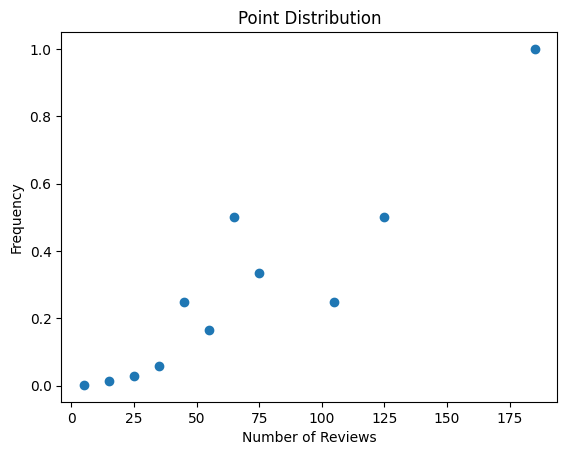

In [5]:
plt.title("Point Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.scatter(gradeRange, courseData)

m:0.005123589013528823 c-0.06037525231037968


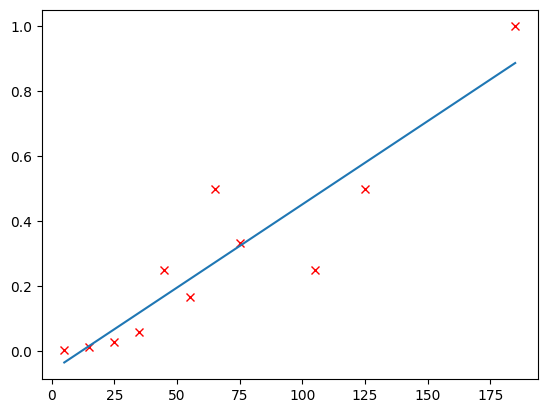

In [6]:
xData = np.array(gradeRange)
yData = np.array(courseData)
mergedData = []

for i in range(len(courseData)):
    mergedData.append([gradeRange[i], courseData[i]])

B = np.ones(len(xData))
A = np.stack([xData, B]).T

m, c = np.linalg.lstsq(A, yData, rcond=None)[0]
print("m:" + str(m), "c" + str(c))
yNew = m*xData + c

plt.figure()
figure3 = plt.plot(xData, yData, 'rx', label = 'Training Data')
figure4 = plt.plot(xData, yNew, label="Numpy Linear Regression")

In [7]:
weighted_GPA = []
for course in data:
    currTotalGrades = getTotalGrades(course)
    if currTotalGrades == 0: continue
    gpa = getGPA(course, currTotalGrades)
    factor = m * currTotalGrades
    weightedGPA = factor * gpa
    tmp = [course['code'], weightedGPA, currTotalGrades ,gpa]
    weighted_GPA.append(tmp)

weighted_GPA.sort(key=lambda x:x[1])
weighted_GPA = weighted_GPA[::-1]



In [8]:
rawData = {}
rawList = []
modelledData = []

with open(f"{DIR}grades.txt", "r") as f:
    data = f.read()
    data = data.split(",\n")
    data = data[:-1]
    for item in data:
        rawData[json.loads(item)["code"]] = json.loads(item)
        rawList.append(json.loads(item))

for courseData in weighted_GPA:
    modelledData.append(rawData[courseData[0]])

for course in rawList:
    if course not in modelledData:
        modelledData.append(course)

with open(f"{DIR}sortedGrades.txt", "w") as f:
    for item in modelledData:
        f.write(json.dumps(item)+",\n")
        print("Course added: " + str(item["code"]))

Course added: CCCH9005
Course added: ECON1210
Course added: ACCT1101
Course added: FINA1310
Course added: ECON1220
Course added: CCST9017
Course added: CCCH9001
Course added: CUND9003
Course added: FINA2322
Course added: CCST9003
Course added: CCCH9007
Course added: CCHU9062
Course added: CCHU9014
Course added: FINA2320
Course added: CAES1000
Course added: MATH1013
Course added: COMP1117
Course added: CCCH9044
Course added: CCHU9021
Course added: CCST9027
Course added: ECON2220
Course added: MATH1009
Course added: CCGL9042
Course added: MATH2014
Course added: ECON2210
Course added: CCHU9075
Course added: CCHU9069
Course added: CCHU9018
Course added: FINA2330
Course added: CCCH9017
Course added: ENGG1330
Course added: CCCH9051
Course added: CCST9049
Course added: CCHU9045
Course added: COMP2113
Course added: COMP2121
Course added: MATH1851
Course added: MATH2101
Course added: CCGL9025
Course added: MATH2012
Course added: CCST9043
Course added: COMP2120
Course added: MKTG2501
Course adde